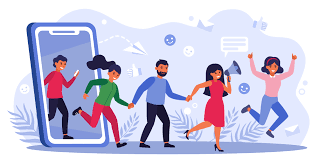

###**Objetivo**
> La tarea es predecir cómo responderán los diferentes segmentos de clientes a un producto o servicio en particular.



###**Contenido**

**Personas**

    ID: **identificador** único del cliente
    Year_Birth: año de nacimiento del cliente
    Education: nivel de educación del cliente
    Marital_Status: estado civil del cliente
    Income: Ingresos familiares anuales del cliente
    Kidhome: Número de niños en el hogar del cliente
    Teenhome:Número de adolescentes en el hogar del cliente
    Dt_Customer: Fecha de inscripción del cliente en la empresa
    Recency: Número de días transcurridos desde la última compra del cliente
    Complain: Quejas del cliente en en los últimos 2 años, donde **1** indica si el cliente se quejó y  **0** en caso contrario

**Productos**

    MntWines: cantidad gastada en vino en los últimos 2 años
    MntFruits: Cantidad gastada en frutas en los últimos 2 años
    MntMeatProducts: Cantidad gastada en carne en los últimos 2 años
    MntFishProducts: Cantidad gastada en pescado en los últimos 2 años
    MntSweetProducts: Cantidad gastada en dulces en los últimos 2 años
    MntGoldProds: cantidad gastada en oro en los últimos 2 años

**Promoción**

    NumDealsPurchases: Número de compras realizadas con descuento
    AcceptedCmp1: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario
    AcceptedCmp2: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario
    AcceptedCmp3: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario
    AcceptedCmp4: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario
    AcceptedCmp5: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario
    Respuesta: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario

**Lugar**

    NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa.
    NumCatalogPurchases: número de compras realizadas mediante un catálogo
    NumStorePurchases: número de compras realizadas directamente en las tiendas
    NumWebVisitsMonth: número de visitas al sitio web de la empresa en el último mes


In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

import datetime
from datetime import date

# Gráficos
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

# Preprocesado y modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv('/content//drive/MyDrive/marketing_campaign.csv', sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Exploración de Datos**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.shape

(2240, 29)

In [6]:
#Eliminando valores faltantes ya que en la columna de ingresos se evidencia que faltan datos 

df = df.dropna()

In [7]:
df.shape

(2216, 29)

In [8]:
df.size

64264

In [9]:
df.isna().sum() #No presenta filas vacias

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Definiendo nuevas variables**

In [11]:
#Fechas de Inscripción en la tienda 
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print(max(dates))
print(min(dates))

2014-12-06
2012-01-08


In [12]:
#Creando la Antiguedad del cliente en días con relación a su fecha de inscripción en la tienda.
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Time_Enrolled_Days"] = days
df["Time_Enrolled_Days"] = pd.to_numeric(df["Time_Enrolled_Days"], errors="coerce")

In [13]:
# Edad del cliente para el año 2021
df['Age']=2021-df['Year_Birth'] 

#Creación de la variable Gasto a partir de diversos items de desembolsos en productos.
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Definiendo el Estado Civil
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Indicando el Total de Hijos que habitan en el Hogar a través de una sola característica. 
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Cantidad de personas que habitan en el hogar unificada en una sola variable. 
df["Family_Size"] = df["Marital_Status"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Variable para definir el número de hijos en el hogar. 
df['Has_child'] = np.where(df.Children> 0, 1, 0)

#Nivel Educativo segmentado en tres grupos 
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Renombrando los productos
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Renombrando los sitios de accesos para adquirir los productos de la tienda. 
df=df.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

In [14]:
#Eliminando categorias innecesarias y algunas que fueron renombradas previamente.
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1) 

In [15]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'Web', 'Catalog', 'Store', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Time_Enrolled_Days', 'Age',
       'Spent', 'Children', 'Family_Size', 'Has_child'],
      dtype='object')

In [16]:
df=df[['Age','Education','Marital_Status','Income','Spent','Time_Enrolled_Days','Kidhome','Teenhome','Has_child','Children','Family_Size', 'Recency','Wines','Fruits','Meat','Fish','Sweets','Gold','NumDealsPurchases','Web','Catalog','Store','NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Response']]
df.head()

,Age,Education,Marital_Status,Income,Spent,Time_Enrolled_Days,Kidhome,Teenhome,Has_child,Children,Family_Size,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,64,Graduate,Alone,58138.0,1617,83894400000000000,0,0,0,0,1,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,67,Graduate,Alone,46344.0,27,10800000000000000,1,1,1,2,3,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,56,Graduate,Partner,71613.0,776,40780800000000000,0,0,0,0,2,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,37,Graduate,Partner,26646.0,53,5616000000000000,1,0,1,1,3,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,40,Postgraduate,Partner,58293.0,422,27734400000000000,1,0,1,1,3,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


**Resumen Estadístico**

In [17]:
df.describe()

,Age,Income,Spent,Time_Enrolled_Days,Kidhome,Teenhome,Has_child,Children,Family_Size,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
count,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52.179603,52247.251354,607.075361,4.423735e+16,0.441787,0.505415,0.714350,0.947202,2.592509,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.064079,0.013538,0.073556,0.074007,0.073105,0.009477,0.150271
std,11.985554,25173.076661,602.900476,2.008532e+16,0.536896,0.544181,0.451825,0.749062,0.905722,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.244950,0.115588,0.261106,0.261842,0.260367,0.096907,0.357417
min,25.000000,1730.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,35303.000000,69.000000,2.937600e+16,0.000000,0.000000,0.000000,0.000000,2.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,51381.500000,396.500000,4.432320e+16,0.000000,0.000000,1.000000,1.000000,3.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,68522.000000,1048.000000,5.927040e+16,1.000000,1.000000,1.000000,1.000000,3.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,128.000000,666666.000000,2525.000000,9.184320e+16,2.000000,2.000000,1.000000,3.000000,5.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


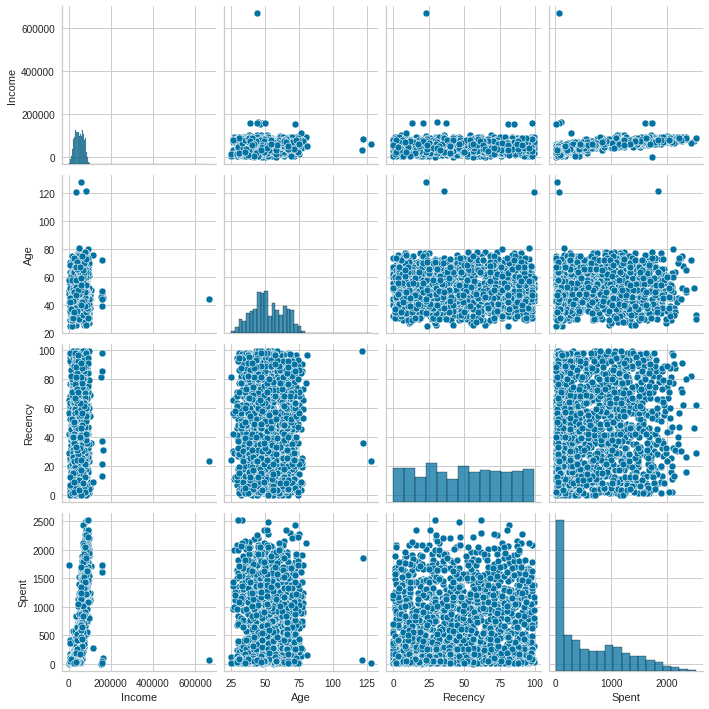

In [18]:
sns.pairplot(df[['Income','Age','Recency','Spent','Marital_Status']])

**Tratando Valores Atípicos**

In [19]:
#Se evidencian valores atípicos en lo que respecta a la categoria edad e ingresos.
#Se debe tomar en cuenta que la edad máxima es de 128 años ya que se trata de una data vieja y se actualizo con fecha al año 2021. 

#Eliminando valores atípicos

df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print(len(df))

2212


**Data Visualización**

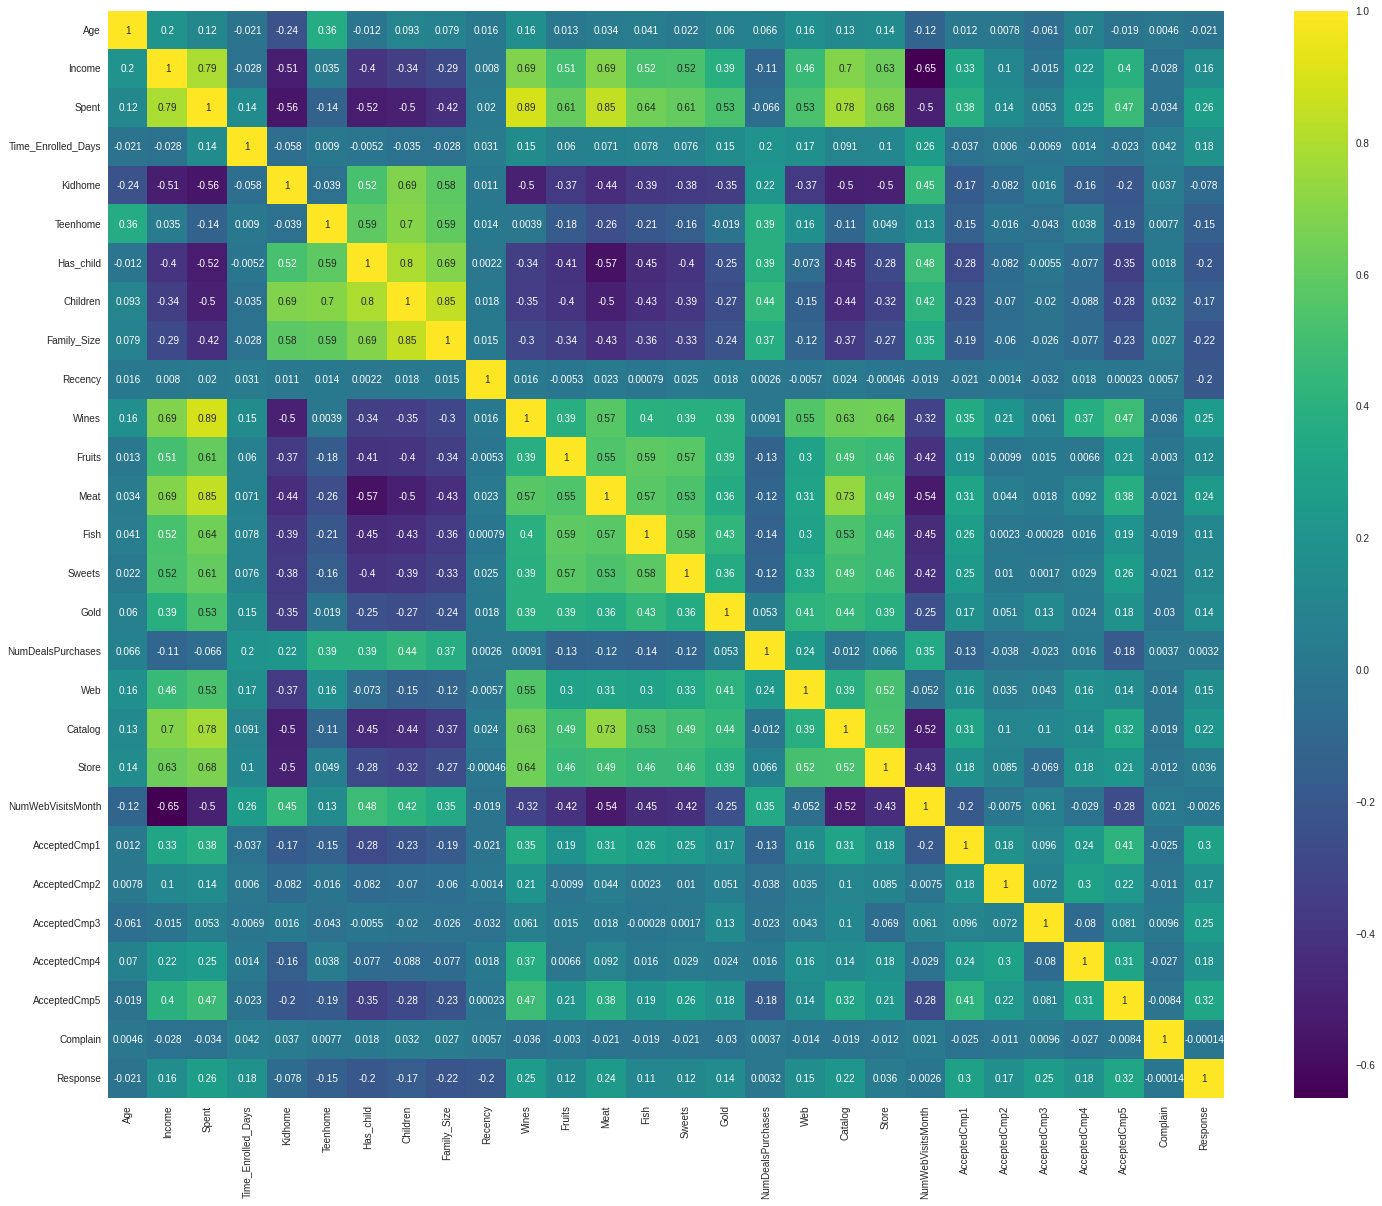

In [20]:
#Verificando la correlación entre variables númericas
corrmat= df.corr()
plt.figure(figsize=(25,20))  
sns.heatmap(df.corr(), annot=True, cmap = 'viridis')
plt.show()

In [21]:
#No hay dos columnas que estén demasiado correlacionadas entre sí, por lo que no podemos eliminar ninguna columna sobre la base de la correlación.

#**Preprocesamiento de Datos**






**Revisando las variables categóricas existentes**

In [22]:
w = (df.dtypes == 'object')
object_cols = list(w[w].index)

print(object_cols)

['Education', 'Marital_Status']


**Transformación de variables categóricas a númericas**

In [23]:
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("Todas las funciones ahora son numéricas")

Todas las funciones ahora son numéricas


**Escalando los datos**
######Proceso de transformación para una mejor versión de los datos con el proposito de reducir posteriormente la dimensionalidad.

In [24]:
#En primer lugar se creara una copia de los datos
ds = df.copy()

#Ahora se procede a remover columnas innecesarias para poder definir el modelo. 
remove_cols= ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']
ds = ds.drop(remove_cols, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
scaled_ds.head() #Marco de datos que se utilizará para el modelado adicional

,Age,Education,Marital_Status,Income,Spent,Time_Enrolled_Days,Kidhome,Teenhome,Has_child,Children,Family_Size,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth
0,1.018352,-0.893586,-1.349603,0.287105,1.676245,1.973583,-0.822754,-0.929699,-1.581139,-1.264598,-1.758359,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181
1,1.274785,-0.893586,-1.349603,-0.260882,-0.963297,-1.665144,1.040021,0.908097,0.632456,1.404572,0.449070,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545
2,0.334530,-0.893586,0.740959,0.913196,0.280110,-0.172664,-0.822754,-0.929699,-1.581139,-1.264598,-0.654644,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908
3,-1.289547,-0.893586,0.740959,-1.176114,-0.920135,-1.923210,1.040021,-0.929699,0.632456,0.069987,0.449070,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818
4,-1.033114,0.571657,0.740959,0.294307,-0.307562,-0.822130,1.040021,-0.929699,0.632456,0.069987,0.449070,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545


**Reducción de dimensionalidad con PCA**

In [25]:
#Aumentando la interpretabilidad pero al mismo tiempo minimizando la pérdida de información.
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(['Education','Income', 'Kidhome']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2212.0,1.310987e-16,2.878377,-5.969393,-2.538494,-0.780421,2.383289,7.444304
Income,2212.0,1.826949e-17,1.706839,-4.312147,-1.328328,-0.158218,1.242309,6.142695
Kidhome,2212.0,-1.279868e-17,1.221956,-3.529884,-0.828123,-0.022126,0.799620,6.610239


**Proyectando la reducción de la dimensión en 3D**

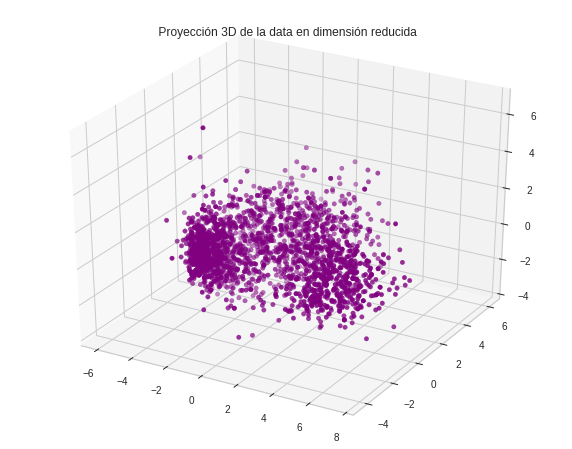

In [26]:
x =PCA_ds['Education']
y =PCA_ds['Income']
z =PCA_ds['Kidhome']
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="purple", marker="o" )
ax.set_title(" Proyección 3D de la data en dimensión reducida")
plt.show()

**CLUSTERING**

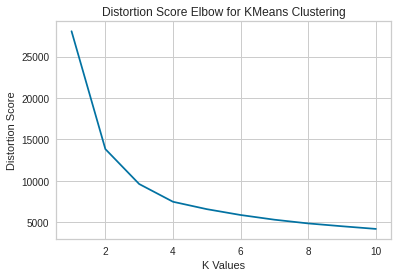

In [27]:
# A través del método del codo "Elbow Mehthod" determinar el número de posibles clusters.

K = range(1, 11)
distortion_score = []

for k in K:
  model = KMeans(n_clusters=k).fit(PCA_ds)
  distortion_score.append(model.inertia_)

plt.plot(K, distortion_score)
plt.xlabel('K Values')
plt.ylabel('Distortion Score')
plt.title('Distortion Score Elbow for KMeans Clustering')

plt.show()

**Ajustando el modelo por agrupación aglomerativa**

In [28]:
#La celda anterior indica que cuatro será un número óptimo de grupos para estos datos.

AC = AgglomerativeClustering(n_clusters=4)

#Ajustando el  modelo para predecir.
AC_df = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = AC_df
#Agregando la función Clústeres al marco de datos original.
df["Clusters"]= AC_df

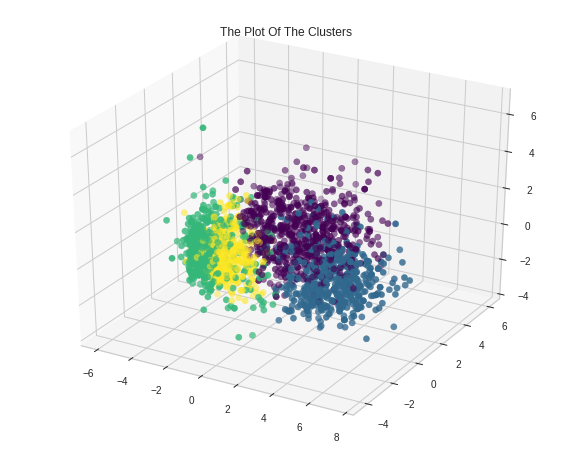

In [29]:
#Plotting
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [30]:
PCA_ds["Clusters"].shape

(2212,)

In [31]:
df["Clusters"].shape

(2212,)

In [32]:
PCA_ds["Clusters"]
PCA_ds.head()

,Education,Income,Kidhome,Clusters
0,4.994348,-0.151277,2.645828,1
1,-2.884455,-0.006672,-1.863759,3
2,2.617863,-0.720870,-0.252232,1
3,-2.676036,-1.542024,-0.923449,2
4,-0.649591,0.209809,-0.021853,0


In [33]:
df["Clusters"]
df.head()

,Age,Education,Marital_Status,Income,Spent,Time_Enrolled_Days,Kidhome,Teenhome,Has_child,Children,Family_Size,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Clusters
0,64,0,0,58138.0,1617,83894400000000000,0,0,0,0,1,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1
1,67,0,0,46344.0,27,10800000000000000,1,1,1,2,3,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,3
2,56,0,1,71613.0,776,40780800000000000,0,0,0,0,2,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,1
3,37,0,1,26646.0,53,5616000000000000,1,0,1,1,3,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2
4,40,1,1,58293.0,422,27734400000000000,1,0,1,1,3,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0


In [34]:
PCA_ds.groupby('Clusters').agg(['mean', 'median', 'max', 'min'])

Education                      ...   Kidhome                    
              mean    median       max  ...    median       max       min
Clusters                                ...                              
0         0.434689  0.395492  4.645633  ...  0.271953  3.490346 -3.086487
1         4.248713  4.261200  7.444304  ... -0.252593  3.596817 -2.676850
2        -2.009888 -2.434904  1.645894  ...  0.474508  6.610239 -3.294173
3        -2.771505 -2.983997 -0.611202  ... -1.026002  1.998997 -3.529884

[4 rows x 12 columns]

## **Evaluando el Modelo**

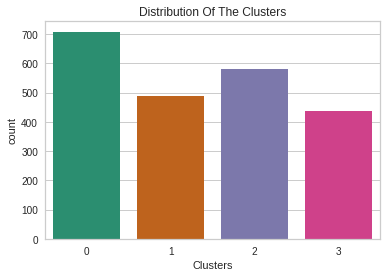

In [35]:
#Distribución de grupos de Clusters

pl = sns.countplot(x=df["Clusters"], palette='Dark2')
pl.set_title("Distribution Of The Clusters")
plt.show()

####**Ingreso/ Gastos**

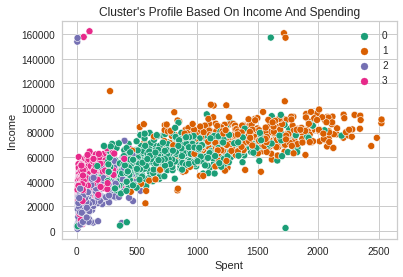

In [49]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette='Dark2')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**El gráfico de ingresos frente a gastos muestra el patrón de agrupaciones:**

> grupo 0: gasto elevado e ingresos medios

> grupo 1: alto gasto e ingresos altos

> grupo 2: bajo gasto e ingresos bajos

> grupo 3: alto gasto y bajos ingresos


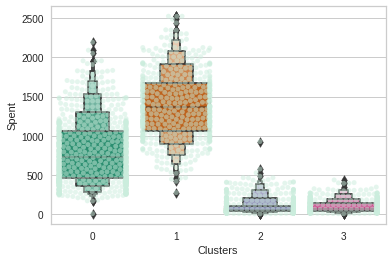

In [37]:
#Distribución detallada de los clústeres según los distintos productos de los datos. 

plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette='Dark2')
plt.show()

In [38]:
# Nuestro mayor número de clientes esta conformado por el grupo numero uno (1) seguido de cerca por el grupo (0)

####**Determinando las campañas que tuvieron mayor aceptación en el pasado**

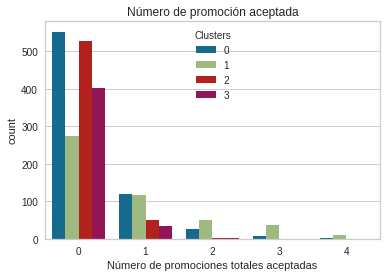

In [39]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

#Plotting de campañas aceptadas.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Número de promoción aceptada")
pl.set_xlabel("Número de promociones totales aceptadas")
plt.show()

In [40]:
#Se evidencia poca aceptación para las campañas.
#estas deben tener una mejora con respecto a la orientación de manera que se pueda obtener un impulso de las ventas.
#En ningún caso las 5 promociones estan funcionando de manera conjunta. 
#En conclusión hay poca receptividad. 

####**Visualizando el número de ofertas adquiridas**

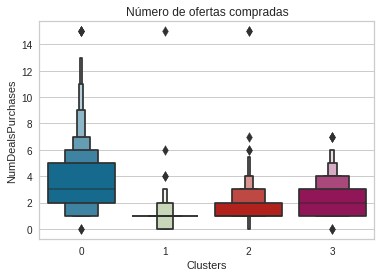

In [41]:
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Número de ofertas compradas")
plt.show()

In [42]:
# Las ofertas ofrecidas tienen una mayor recepción a diferencia de las campañas. 
# Se evidencia que los mayores captadores fueron los grupos cero (0) y tres (3). 
# El grupo número uno (1) que esta conformado por el mayor número de clientes no obtuvo interes. 
# El grupo número dos (2) no se encuentra del todo interesado. 

**Organizando para su análisis**

<Figure size 432x288 with 0 Axes>

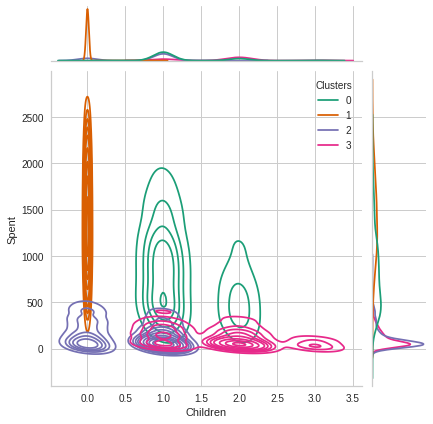

<Figure size 432x288 with 0 Axes>

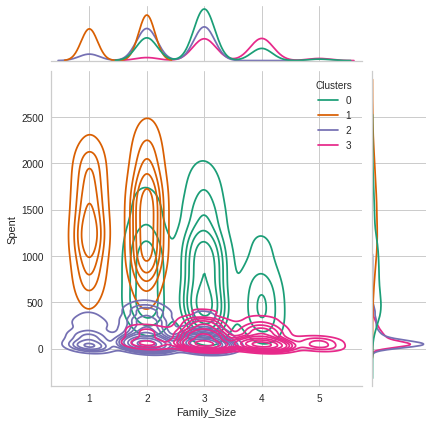

<Figure size 432x288 with 0 Axes>

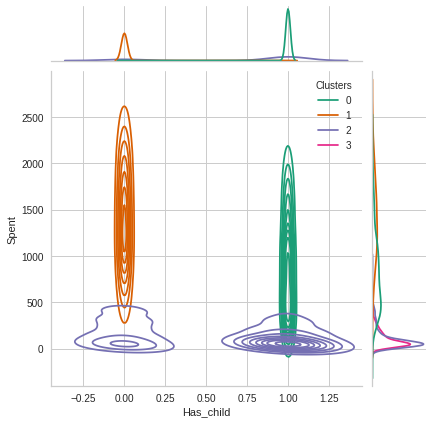

<Figure size 432x288 with 0 Axes>

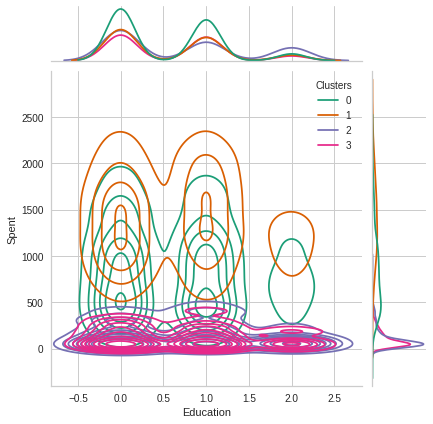

<Figure size 432x288 with 0 Axes>

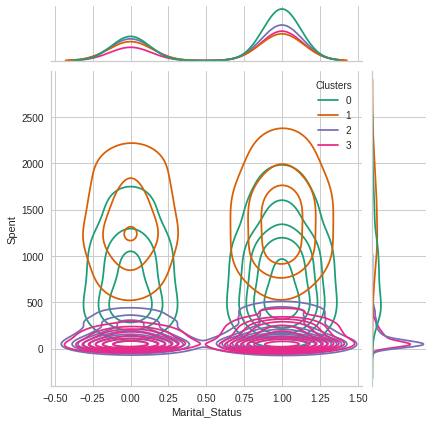

In [43]:
Personal = [ "Kidhome","Teenhome","Time_Enrolled_Days", "Age", "Children", "Family_Size", "Has_child", "Education","Marital_Status"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette='Dark2')
    plt.show()

**Usando Diagrama de Cajas para validar la información.**

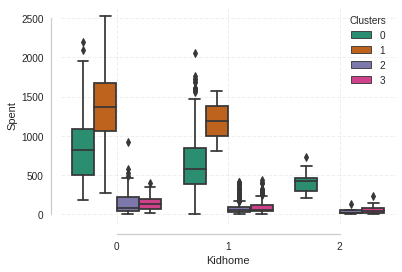

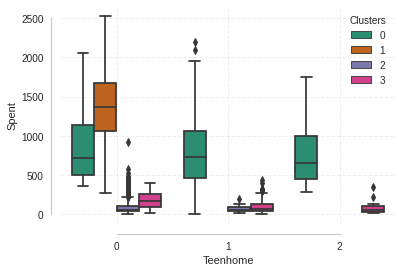

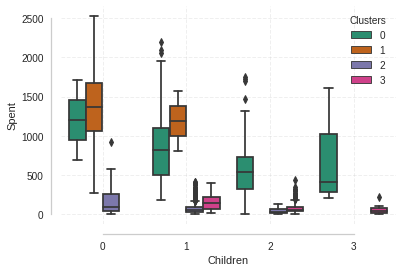

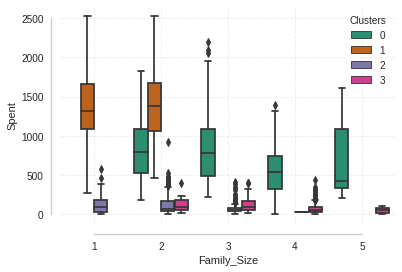

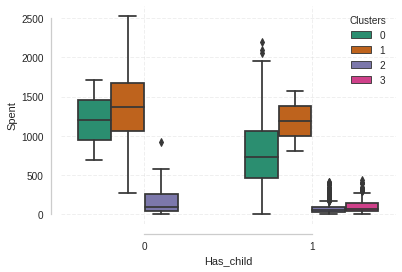

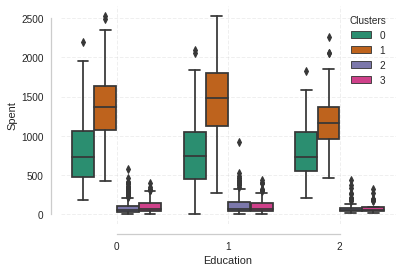

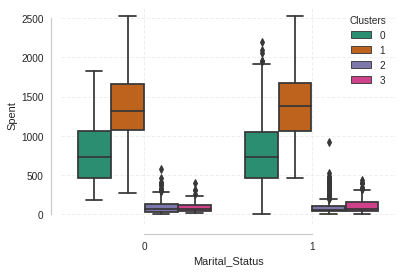

In [44]:
Personal_2 = [ "Kidhome","Teenhome","Children", "Family_Size", "Has_child", "Education","Marital_Status"]

for i in Personal_2:
    plt.figure()
    sns.boxplot(x=df[i], y=df["Spent"], hue =df["Clusters"], palette='Dark2')
    sns.despine(offset=10, trim=True)
    plt.grid(linestyle="--", alpha=0.3)
    plt.show()

**Conclusiones**

> **CLUSTER O:** Los clientes estan representados por padres, en el hogar habitan un máximo de 4 miembros, la mayoria representan como estado civil solteros y en casa tienen hijos en edad adolescente, la edad esta en rango es relativamente mayor. 

> **CLUSTER 1:** En este segmento no estan presentes padres de familias, en el hogar habitan un máximo de 2 miembros, pocas personas estan solteras y abarca todas las edades. 

> **CLUSTER 2:** La mayoría de las personas son padres de familia, con una cantidad máxima de 3 habitantes por hogar, los hijos son menores de edad y en el grupo predomina una edad mas joven. 

> **CLUSTER 3:** Definitivamente representada por padres de familia, con una cantidad máxima de 5 habitantes por hogar, en su mayoría los hijos estan en edad adolescente, se trata de un grupo con una edad bastante mayor y donde se evidencia la menor cantidad de ingresos. 


**Otra recomendación**

In [45]:
!pip install hdbscan

In [46]:
import hdbscan
import scipy.cluster.hierarchy as hierarchy

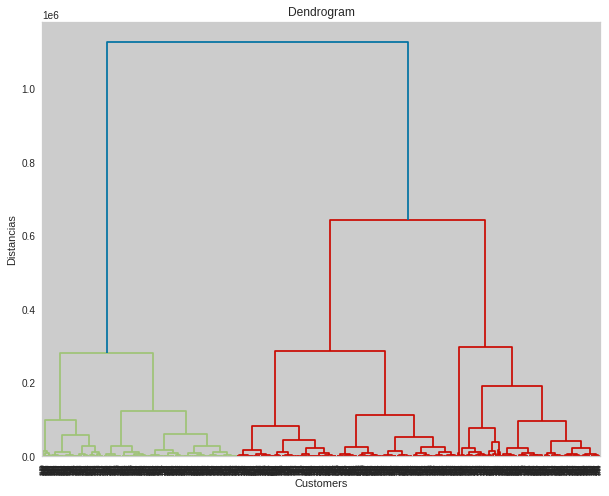

In [47]:
X = df.iloc[:, [3, 4]].values

plt.figure(figsize=(10, 8))

dendogram = hierarchy.dendrogram(hierarchy.linkage(X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distancias')
plt.show()

In [48]:
# A través del dendrogram la recomendación esta dada para 6 Clusters para una optima agrupación.
# Sin embargo se recomienda cortar el dendograma para generar los clusters.
# Un solo dendrograma se dispone de la flexibilidad para generar cualquier número de clusters desde 1 a n.
# Al aplicar el corte se puede visualizar un número optimo.
# Una forma de identificar el número de clusters, es inspeccionar visualmente el dendograma.
# Y luego decidir a qué altura se corta para generar los clusters.